<a href="https://colab.research.google.com/github/bintangnabiil/Hands-On-Machine-Learning-with-Scikit-Learn-Keras-and-TensorFlow/blob/main/Rangkuman_Chapter_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Chapter 14: Deep Computer Vision Using Convolutional Neural Networks
Convolutional Neural Networks (CNN) merupakan arsitektur deep learning yang sangat efektif untuk memproses data visual seperti gambar. CNN terinspirasi dari cara kerja korteks visual pada mamalia, di mana neuron-neuron tertentu hanya merespon pada pola visual tertentu dalam area terbatas dari bidang visual.

##1. Keunggulan CNN dibanding Fully Connected Networks:

- Parameter Sharing: Filter yang sama digunakan di seluruh gambar, mengurangi jumlah parameter
- Translation Invariance: Dapat mendeteksi fitur yang sama di berbagai posisi dalam gambar
- Hierarchical Feature Learning: Membangun fitur kompleks dari fitur sederhana secara bertahap

##2. Komponen Utama CNN
###a) Convolutional Layer
Layer konvolusi adalah inti dari CNN yang melakukan operasi konvolusi antara input dan filter (kernel). Setiap filter mendeteksi fitur tertentu seperti garis, sudut, atau pola tekstur.

###Parameter penting:

- Kernel Size: Ukuran filter (biasanya 3x3, 5x5, atau 7x7)
- Stride: Langkah pergeseran filter
- Padding: Menambahkan piksel di tepi untuk mempertahankan ukuran spatial
- Number of Filters: Menentukan depth dari output feature map

###b) Pooling Layer
Layer pooling mengurangi dimensi spatial dari feature map sambil mempertahankan informasi penting. Ini membantu mengurangi overfitting dan computational cost.

###Jenis pooling:

- Max Pooling: Mengambil nilai maksimum dari area tertentu
- Average Pooling: Mengambil rata-rata dari area tertentu
- Global Average Pooling: Mengambil rata-rata dari seluruh feature map

###c) Activation Functions
Fungsi aktivasi memperkenalkan non-linearitas ke dalam network. ReLU (Rectified Linear Unit) adalah yang paling umum digunakan karena efisiensi komputasi dan kemampuan mengatasi vanishing gradient problem.

##3. Arsitektur CNN Klasik
###a) LeNet-5 (1998)
Arsitektur CNN pertama yang sukses, digunakan untuk mengenali digit tulisan tangan. Struktur sederhana dengan 2 convolutional layer dan 2 fully connected layer.

###b) AlexNet (2012)
Revolusi dalam computer vision dengan penggunaan:

- ReLU activation function
- Dropout untuk regularization
- Data augmentation
- GPU acceleration

###c) VGGNet (2014)
Memperkenalkan konsep "deeper is better" dengan:

- Penggunaan filter 3x3 secara konsisten
- Arsitektur yang sangat dalam (16-19 layer)
- Menunjukkan pentingnya depth dalam CNN

###d) ResNet (2015)
Mengatasi masalah vanishing gradient dengan residual connections:

- Skip connections memungkinkan gradient mengalir langsung
- Memungkinkan training network dengan ratusan layer
- Batch normalization untuk stabilitas training

##4. Teknik Advanced dalam CNN
###a) Transfer Learning
Menggunakan model yang telah dilatih pada dataset besar (seperti ImageNet) sebagai starting point untuk task baru. Pendekatan ini sangat efektif ketika dataset terbatas.

###Strategi Transfer Learning:

- Feature Extraction: Freeze convolutional layers, hanya train classifier
- Fine-tuning: Unfreeze beberapa layer teratas dan train dengan learning rate rendah

###b) Data Augmentation
Meningkatkan variasi data training dengan transformasi gambar:

- Rotation, flipping, scaling
- Color jittering
- Cutout, mixup, cutmix
- Geometric transformations

###c) Regularization Techniques

- Dropout: Randomly deactivate neurons during training
- Batch Normalization: Normalize inputs to each layer
- Weight Decay: L2 regularization pada weights

#Implementasi Kode
##1. Load dan Prepricess

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Load dan preprocess dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to categorical
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


##2. Model CNN Sederhana

In [2]:
# Membuat model CNN sederhana
def create_simple_cnn():
    model = keras.Sequential([
        # First Convolutional Block
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Second Convolutional Block
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Third Convolutional Block
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.25),

        # Classification Head
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])

    return model

# Create dan compile model
model = create_simple_cnn()
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 737,834 (2.81 MB)

 Trainable params: 736,362 (2.81 MB)

 Non-trainable params: 1,472 (5.75 KB)

##3. Data Augmentation dan Training Model

In [3]:
# Data Augmentation
datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)

# Fit augmentation pada training data
datagen.fit(x_train)

# Callbacks untuk training
callbacks = [
    keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
    keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=3),
    keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True)
]

# Training model
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    steps_per_epoch=len(x_train) // 32,
    epochs=50,
    validation_data=(x_test, y_test),
    callbacks=callbacks,
    verbose=1
)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.3087 - loss: 2.2090

1562/1562 ━━━━━━━━━━━━━━━━━━━━ 237s 148ms/step - accuracy: 0.3087 - loss: 2.2088 - val_accuracy: 0.5286 - val_loss: 1.3391 - learning_rate: 0.0010
Epoch 2/50
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 2:53 111ms/step - accuracy: 0.5938 - loss: 1.3803

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5938 - loss: 1.3803 - val_accuracy: 0.5300 - val_loss: 1.3351 - learning_rate: 0.0010
Epoch 3/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 255s 150ms/step - accuracy: 0.4827 - loss: 1.4333 - val_accuracy: 0.5210 - val_loss: 1.4298 - learning_rate: 0.0010
Epoch 4/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5000 - loss: 1.2348 - val_accuracy: 0.5235 - val_loss: 1.4204 - learning_rate: 0.0010
Epoch 5/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 251s 149ms/step - accuracy: 0.5565 - loss: 1.2457 - val_accuracy: 0.5528 - val_loss: 1.3658 - learning_rate: 0.0010
Epoch 6/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6250 - loss: 1.0842 - val_accuracy: 0.5459 - val_loss: 1.3988 - learning_rate: 5.0000e-04
Epoch 7/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.6248 - loss: 1.0630

1562/1562 ━━━━━━━━━━━━━━━━━━━━ 252s 150ms/step - accuracy: 0.6248 - loss: 1.0630 - val_accuracy: 0.6514 - val_loss: 1.0185 - learning_rate: 5.0000e-04
Epoch 8/50
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 2:58 114ms/step - accuracy: 0.6562 - loss: 1.0383

1562/1562 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6562 - loss: 1.0383 - val_accuracy: 0.6554 - val_loss: 1.0055 - learning_rate: 5.0000e-04
Epoch 9/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.6513 - loss: 0.9908

1562/1562 ━━━━━━━━━━━━━━━━━━━━ 251s 150ms/step - accuracy: 0.6513 - loss: 0.9908 - val_accuracy: 0.7093 - val_loss: 0.8319 - learning_rate: 5.0000e-04
Epoch 10/50
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 4:06 158ms/step - accuracy: 0.6250 - loss: 0.8725

1562/1562 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6250 - loss: 0.8725 - val_accuracy: 0.7086 - val_loss: 0.8316 - learning_rate: 5.0000e-04
Epoch 11/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.6665 - loss: 0.9471

1562/1562 ━━━━━━━━━━━━━━━━━━━━ 234s 150ms/step - accuracy: 0.6665 - loss: 0.9471 - val_accuracy: 0.7180 - val_loss: 0.8140 - learning_rate: 5.0000e-04
Epoch 12/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7500 - loss: 0.6372 - val_accuracy: 0.7171 - val_loss: 0.8185 - learning_rate: 5.0000e-04
Epoch 13/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.6783 - loss: 0.9210

1562/1562 ━━━━━━━━━━━━━━━━━━━━ 256s 152ms/step - accuracy: 0.6783 - loss: 0.9210 - val_accuracy: 0.7454 - val_loss: 0.7259 - learning_rate: 5.0000e-04
Epoch 14/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6250 - loss: 0.9741 - val_accuracy: 0.7451 - val_loss: 0.7289 - learning_rate: 5.0000e-04
Epoch 15/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 237s 152ms/step - accuracy: 0.6888 - loss: 0.8893 - val_accuracy: 0.7141 - val_loss: 0.8291 - learning_rate: 5.0000e-04
Epoch 16/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6875 - loss: 1.0199 - val_accuracy: 0.7136 - val_loss: 0.8305 - learning_rate: 5.0000e-04
Epoch 17/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.7085 - loss: 0.8367

1562/1562 ━━━━━━━━━━━━━━━━━━━━ 235s 151ms/step - accuracy: 0.7085 - loss: 0.8367 - val_accuracy: 0.7477 - val_loss: 0.7197 - learning_rate: 2.5000e-04
Epoch 18/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8125 - loss: 0.5849 - val_accuracy: 0.7462 - val_loss: 0.7229 - learning_rate: 2.5000e-04
Epoch 19/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.7165 - loss: 0.8159

1562/1562 ━━━━━━━━━━━━━━━━━━━━ 254s 152ms/step - accuracy: 0.7165 - loss: 0.8159 - val_accuracy: 0.7680 - val_loss: 0.6567 - learning_rate: 2.5000e-04
Epoch 20/50
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 2:54 112ms/step - accuracy: 0.7500 - loss: 0.8740

1562/1562 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7500 - loss: 0.8740 - val_accuracy: 0.7696 - val_loss: 0.6519 - learning_rate: 2.5000e-04
Epoch 21/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 251s 151ms/step - accuracy: 0.7188 - loss: 0.8018 - val_accuracy: 0.7596 - val_loss: 0.7103 - learning_rate: 2.5000e-04
Epoch 22/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7188 - loss: 0.7827 - val_accuracy: 0.7598 - val_loss: 0.7089 - learning_rate: 2.5000e-04
Epoch 23/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 248s 158ms/step - accuracy: 0.7258 - loss: 0.7915 - val_accuracy: 0.7527 - val_loss: 0.7240 - learning_rate: 2.5000e-04
Epoch 24/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6250 - loss: 1.0706 - val_accuracy: 0.7531 - val_loss: 0.7219 - learning_rate: 1.2500e-04
Epoch 25/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 240s 154ms/step - accuracy: 0.7386 - loss: 0.7592 - val_accuracy: 0.7658 - val_loss: 0.6687 - learning_rate: 1.2500e-04


##5. Evaluasi dan Visualisasi

Test Accuracy: 0.7696


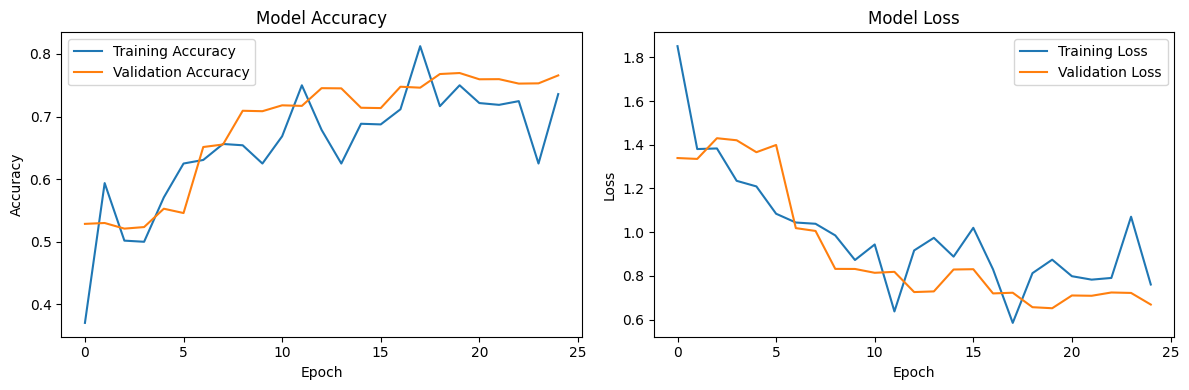

In [4]:
# Evaluasi model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

##6. Transfer Learning dengan Pre-trained Model

In [5]:
# Load pre-trained VGG16 model
base_model = keras.applications.VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(32, 32, 3)
)

# Freeze base model
base_model.trainable = False

# Create new model dengan transfer learning
def create_transfer_model():
    model = keras.Sequential([
        # Resize input untuk VGG16 (minimal 32x32)
        layers.Lambda(lambda x: tf.image.resize(x, (32, 32))),

        # Pre-trained base
        base_model,

        # Custom classifier
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])

    return model

# Create dan compile transfer learning model
transfer_model = create_transfer_model()
transfer_model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Training dengan transfer learning
transfer_history = transfer_model.fit(
    x_train, y_train,
    batch_size=32,
    epochs=10,
    validation_data=(x_test, y_test),
    verbose=1
)

# Evaluasi transfer learning model
transfer_test_loss, transfer_test_accuracy = transfer_model.evaluate(x_test, y_test, verbose=0)
print(f"Transfer Learning Test Accuracy: {transfer_test_accuracy:.4f}")

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 762s 487ms/step - accuracy: 0.3848 - loss: 1.7363 - val_accuracy: 0.5366 - val_loss: 1.3215
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 792s 480ms/step - accuracy: 0.5274 - loss: 1.3648 - val_accuracy: 0.5676 - val_loss: 1.2327
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 803s 481ms/step - accuracy: 0.5471 - loss: 1.3081 - val_accuracy: 0.5785 - val_loss: 1.2114
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 797s 478ms/step - accuracy: 0.5570 - loss: 1.2622 - val_accuracy: 0.5796 - val_loss: 1.2021
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 775s 461ms/step - accuracy: 0.5662 - loss: 1.2371 - val_accuracy: 0.5769 - val_loss: 1.1967
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 763s 474ms/step - accuracy: 0.5668 - loss: 1.2456 - val_accuracy: 0.5862 - val_loss: 1.1736
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 736s 471ms/step - accuracy: 0.5775 - loss: 1.2155 - val_accuracy: 0.5911 - val_loss: 1.1694
Epoch 8/10


##7. Visualisasi Feature Maps

In [ ]:
# Fungsi untuk visualisasi feature maps
def visualize_feature_maps(model, img, layer_names):
    # Create model yang output intermediate layers
    outputs = [model.get_layer(name).output for name in layer_names]
    activation_model = keras.Model(inputs=model.input, outputs=outputs)

    # Get aktivasi
    activations = activation_model.predict(img[np.newaxis, ...])

    # Plot feature maps
    for layer_name, activation in zip(layer_names, activations):
        n_features = min(16, activation.shape[-1])  # Max 16 feature maps
        size = activation.shape[1]

        plt.figure(figsize=(16, 16))
        for i in range(n_features):
            plt.subplot(4, 4, i + 1)
            plt.imshow(activation[0, :, :, i], cmap='viridis')
            plt.title(f'{layer_name} - Feature {i}')
            plt.axis('off')
        plt.suptitle(f'Feature Maps from {layer_name}')
        plt.show()

# Visualisasi untuk sample image
sample_img = x_test[0]
layer_names = ['conv2d', 'conv2d_2', 'conv2d_4']  # Adjust sesuai nama layer
visualize_feature_maps(model, sample_img, layer_names)

##8. Teknik Optimisasi CNN

In [ ]:
# Cyclical Learning Rate
def cyclical_learning_rate(epoch, lr):
    base_lr = 1e-4
    max_lr = 1e-2
    step_size = 10

    cycle = np.floor(1 + epoch / (2 * step_size))
    x = np.abs(epoch / step_size - 2 * cycle + 1)
    lr = base_lr + (max_lr - base_lr) * np.maximum(0, (1 - x))
    return lr

lr_scheduler = keras.callbacks.LearningRateScheduler(cyclical_learning_rate)

In [ ]:
# Enable mixed precision untuk efisiensi training
policy = keras.mixed_precision.Policy('mixed_float16')
keras.mixed_precision.set_global_policy(policy)

# Model dengan mixed precision
model_fp16 = create_simple_cnn()
model_fp16.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)